In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from src.california_housing import read_data

# Load Data

In [2]:
# Load the train-data
df_train = read_data.read_file(folder="california_housing",filename="strat_train_set", csv=True)

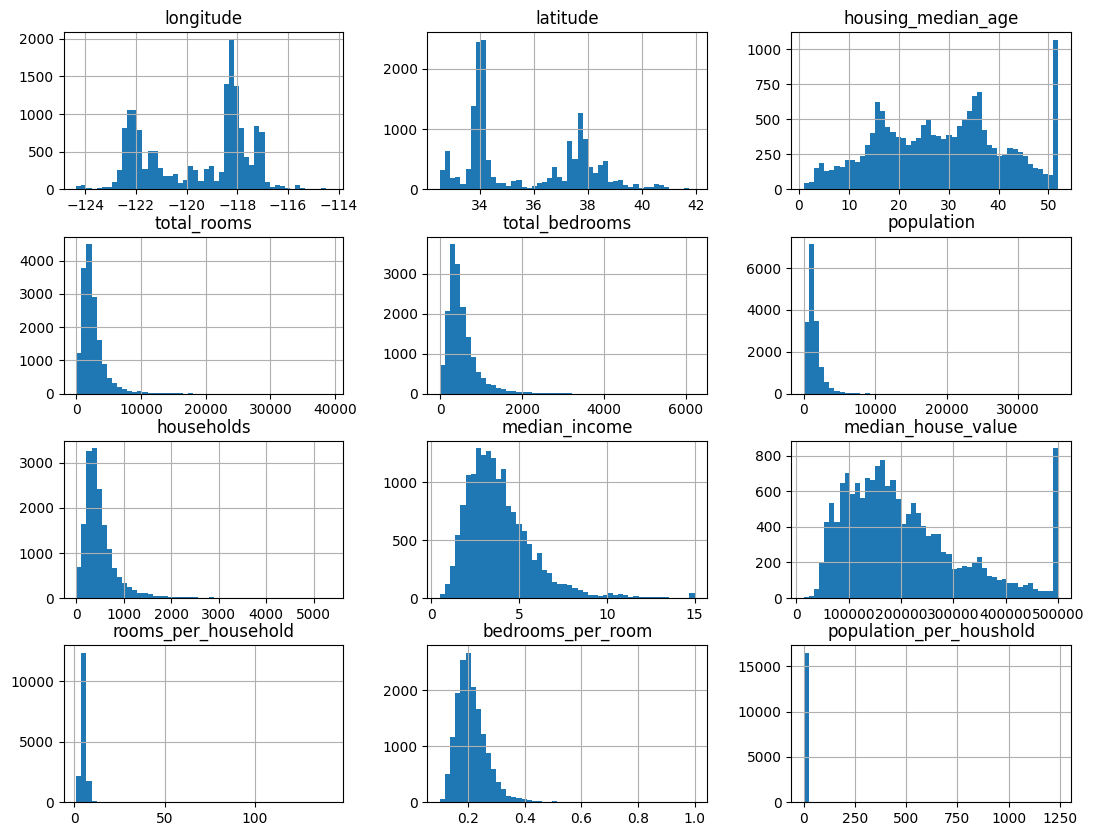

In [3]:
# Plot the distribution of the numerical variables
df_train.hist(bins=50, figsize=(13,10))
plt.show()

# Exploratory Data Analysis

## Observations by Population and Median-House-Value

First we plot the observations by longitude and latitude, which represents the shape of the state of California. Then we want to adjust the dot-size according to the population present at this observation. Further, we plot the median-house-value as well, whereas red dots indicate a high median value of a house and blue a low median value. One can see that at the coast the prices seem to be highest. Also the most houses are available there.

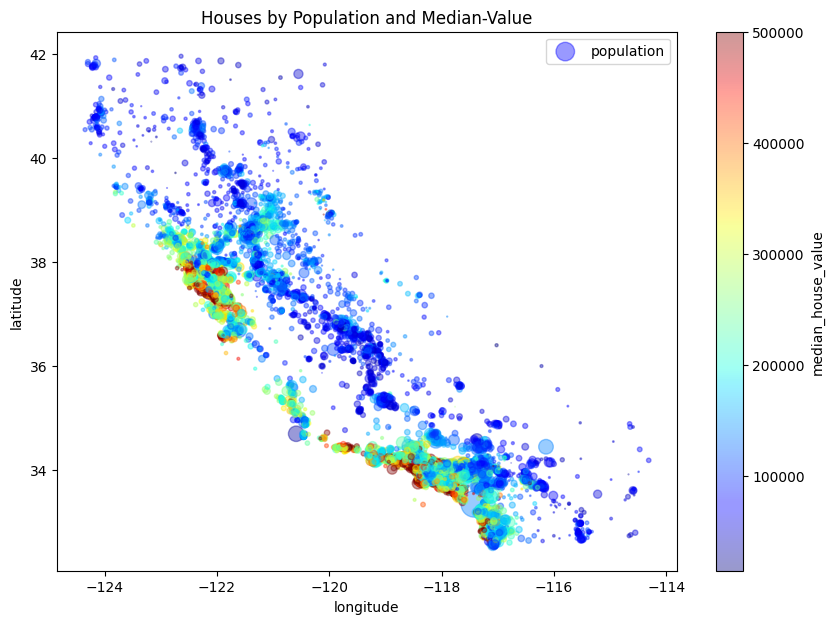

In [4]:
df_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
              s=df_train["population"]/100, label="population", figsize=(10,7),
              c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.title("Houses by Population and Median-Value")
plt.legend()
plt.show()

## Correlation between Variables

It seems that median-income and median-house-value correlate the most with each other. There seems to be a linear relationship present as well. Additionally some features display a right-skewed behaviour - if features / variables display such a behaviour it might be a good idea to transform them (Logaritmic transformation for example).

In [5]:
# Check which variables correlate with median_house_value
df_train_numerical = df_train.select_dtypes(include='number')
corr_matrix = df_train_numerical.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.687151
rooms_per_household        0.146255
total_rooms                0.135140
housing_median_age         0.114146
households                 0.064590
total_bedrooms             0.047781
population_per_houshold   -0.021991
population                -0.026882
longitude                 -0.047466
latitude                  -0.142673
bedrooms_per_room         -0.259952
Name: median_house_value, dtype: float64

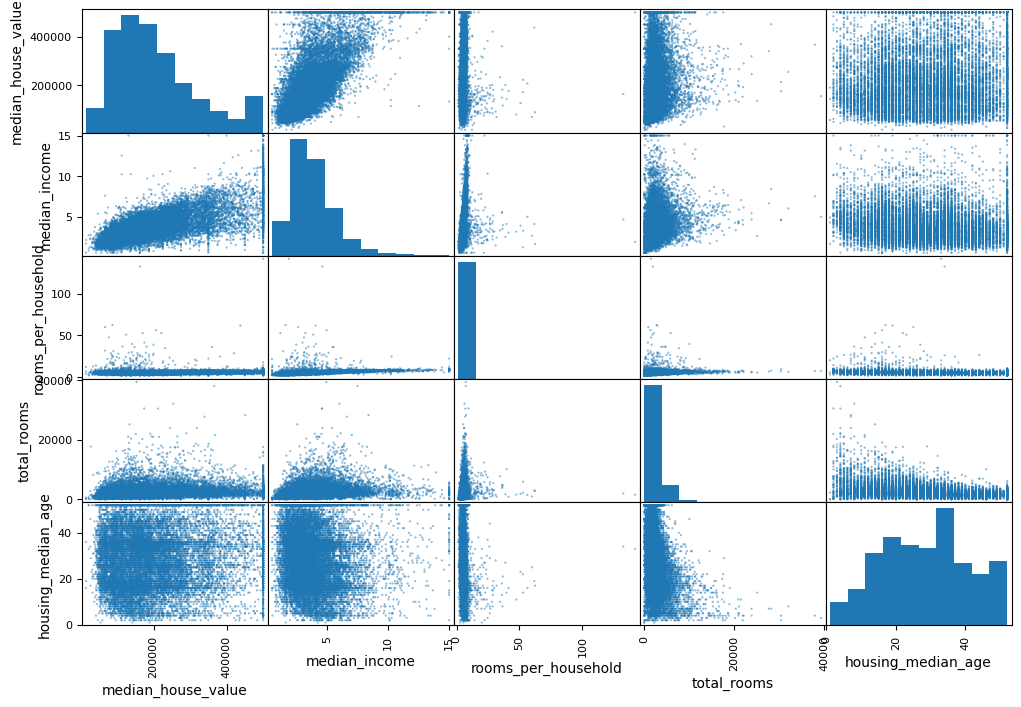

In [6]:
# Define the variables to check
attributes = ["median_house_value", "median_income", "rooms_per_household", "total_rooms", "housing_median_age"]
scatter_matrix(df_train[attributes], figsize=(12,8), s=10)
plt.show()

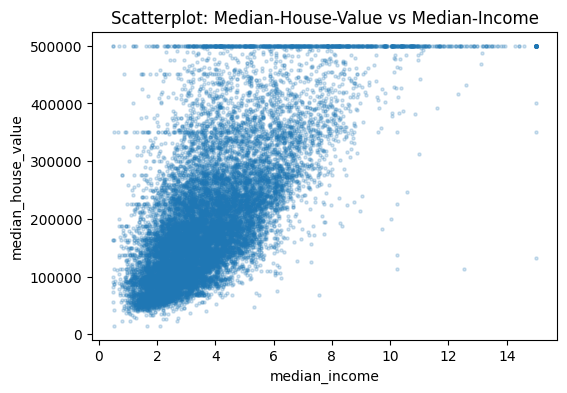

In [7]:
# Plot the relationship of median-income and median-house-value
df_train.plot(kind="scatter", x="median_income", y="median_house_value",
              figsize=(6,4), s=5, alpha=0.2)
plt.title("Scatterplot: Median-House-Value vs Median-Income")
plt.show()